<a href="https://colab.research.google.com/github/lmcanavals/machine_learning/blob/main/1003_load_model_and_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

In [24]:
fashionmodel = models.load_model('fashion.keras')

In [25]:
fashionmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5

In [32]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [33]:
x_train = x_train / 255.
x_test = x_test / 255.
x_train = x_train.reshape(*x_train.shape, 1)
x_test = x_test.reshape(*x_test.shape, 1)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


(-0.5, 27.5, 27.5, -0.5)

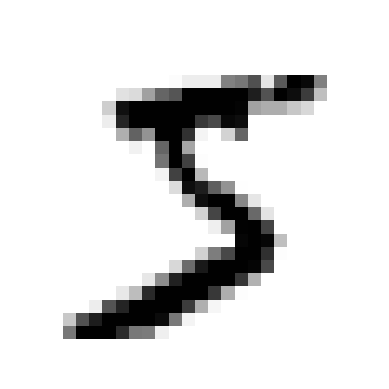

In [12]:
plt.imshow(x_train[0], cmap='gray_r')
plt.axis('off')

In [34]:
fashionmodel.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 19.4455 - accuracy: 0.1160


[19.44547462463379, 0.11599999666213989]

In [35]:
fashionmodel.layers.pop()

In [36]:
for layer in fashionmodel.layers:
    layer.trainable = False

In [39]:
model = keras.Sequential([
    fashionmodel,
    layers.Dense(10, activation='softmax')])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.build(input_shape=(None, 28, 28, 1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 10)                72778     
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
Total params: 72888 (284.72 KB)
Trainable params: 110 (440.00 Byte)
Non-trainable params: 72778 (284.29 KB)
_________________________________________________________________


In [40]:
model.fit(x_train[:1000], y_train[:1000],
          validation_data=[x_test, y_test],
          epochs=10)

Epoch 1/10
32/32 [==============================] - 7s 187ms/step - loss: 2.3360 - accuracy: 0.1050 - val_loss: 2.3176 - val_accuracy: 0.1001
Epoch 2/10
32/32 [==============================] - 3s 91ms/step - loss: 2.3287 - accuracy: 0.0970 - val_loss: 2.3095 - val_accuracy: 0.1031
Epoch 3/10
32/32 [==============================] - 3s 92ms/step - loss: 2.3213 - accuracy: 0.1010 - val_loss: 2.3025 - val_accuracy: 0.1044
Epoch 4/10
32/32 [==============================] - 3s 92ms/step - loss: 2.3047 - accuracy: 0.1020 - val_loss: 2.2960 - val_accuracy: 0.1048
Epoch 5/10
32/32 [==============================] - 5s 177ms/step - loss: 2.3087 - accuracy: 0.1010 - val_loss: 2.2895 - val_accuracy: 0.1075
Epoch 6/10
32/32 [==============================] - 3s 91ms/step - loss: 2.3011 - accuracy: 0.1070 - val_loss: 2.2838 - val_accuracy: 0.1101
Epoch 7/10
32/32 [==============================] - 3s 91ms/step - loss: 2.2924 - accuracy: 0.1120 - val_loss: 2.2786 - val_accuracy: 0.1216
Epoch 8/10
